In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
from pymc.Matplot import plot as pmplot

sns.set()

In [2]:
df = pd.read_csv('Folkhalsomyndigheten.csv',sep=';',encoding='ISO-8859-1')
df['Region'].replace('Jämtland Härjedalen','Jämtland',inplace=True)
df['Region'].replace('Sörmland','Södermanland',inplace=True)
df.set_index('Region',inplace=True)
df

,Totalt_antal_fall,Fall_per_100000_inv,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
Region,,,,
Blekinge,30,19,2,1
Dalarna,163,57,11,16
Gotland,12,20,1,0
Gävleborg,163,57,14,4
Halland,126,38,10,9
Jämtland,86,66,2,0
Jönköping,199,55,17,13
Kalmar,47,19,4,1
Kronoberg,49,24,1,0


In [3]:
pop_df = pd.read_csv('sverige_befolkning.csv',sep=';',thousands=' ',header=None,usecols=[0,1,2])
pop_df.set_index(0,inplace=True)
pop_df

,1,2
0,,
,Riket,10327589
01,Stockholm,2377081
0127,Botkyrka,94606
0162,Danderyd,32857
0125,Ekerö,28690
...,...,...
2521,Pajala,6052
2581,Piteå,42281
2560,Älvsbyn,8066


In [4]:
def regioner(x):
    if len(x) == 2:
        return 'region'
    else:
        return 'kommun'

grouped = pop_df.groupby(regioner)

region_df = grouped.get_group('region')
region_df = region_df.set_index(1)
region_df.rename(columns={2:'befolkning'},inplace=True)
region_df.index.name='region'

region_data = pd.read_csv('sveriges_regioner.csv',sep=';',encoding='utf-8',index_col='region')
region_df = region_df.join(region_data)
region_df

,befolkning,density
region,,
Stockholm,2377081,364.90
Uppsala,383713,46.90
Södermanland,297540,49.00
Östergötland,465495,44.10
Jönköping,363599,34.80
Kronoberg,201469,23.90
Kalmar,245446,22.00
Gotland,59686,19.00
Blekinge,159606,54.50


In [5]:
df = df.join(region_df)
df.drop('Fall_per_100000_inv',axis=1,inplace=True)
df.columns=['confirmed','icu','dead','population','density']
df['conf_per_M'] = df['confirmed'] / (df['population'] / 1e6)
df['dead_per_M'] = df['dead'] / (df['population'] / 1e6)
df.sort_values('dead_per_M',inplace=True,ascending=False)
df

,confirmed,icu,dead,population,density,conf_per_M,dead_per_M
Region,,,,,,,
Södermanland,412,45,45,297540,49.00,1384.687773,151.240169
Stockholm,2849,230,225,2377081,364.90,1198.528784,94.653905
Dalarna,163,11,16,287966,10.30,566.039046,55.562115
Jönköping,199,17,13,363599,34.80,547.306236,35.753674
Halland,126,10,9,333848,61.50,377.417268,26.958376
Östergötland,584,35,12,465495,44.10,1254.578459,25.779009
Uppsala,274,22,9,383713,46.90,714.075364,23.455030
Västmanland,139,12,4,275845,53.90,503.906179,14.500897
Gävleborg,163,14,4,287382,15.90,567.189316,13.918756


In [6]:
print (df.describe())
df.sum()

         confirmed         icu        dead    population     density  \
count    21.000000   21.000000   21.000000  2.100000e+01   21.000000   
mean    306.809524   24.761905   17.761905  4.917900e+05   51.067143   
std     604.479662   49.143570   48.601342  5.874744e+05   77.570084   
min      12.000000    1.000000    0.000000  5.968600e+04    2.570000   
25%      61.000000    4.000000    1.000000  2.454460e+05   15.900000   
50%     139.000000   11.000000    4.000000  2.873820e+05   34.800000   
75%     274.000000   19.000000   12.000000  3.635990e+05   53.900000   
max    2849.000000  230.000000  225.000000  2.377081e+06  364.900000   

        conf_per_M  dead_per_M  
count    21.000000   21.000000  
mean    513.023514   23.311740  
std     361.420802   37.057932  
min     187.667750    0.000000  
25%     243.213596    3.540901  
50%     377.417268    8.151720  
75%     567.189316   25.779009  
max    1384.687773  151.240169  


confirmed     6.443000e+03
icu           5.200000e+02
dead          3.730000e+02
population    1.032759e+07
density       1.072410e+03
conf_per_M    1.077349e+04
dead_per_M    4.895465e+02
dtype: float64

In [7]:
df_age = pd.read_csv('Folkhalsomyndigheten_age.csv',sep=';',encoding='ISO-8859-1')
df_age

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Ålder_0_9,43,1,0
1,Ålder_10_19,143,0,0
2,Ålder_20_29,503,22,3
3,Ålder_30_39,651,23,1
4,Ålder_40_49,935,71,1
5,Ålder_50_59,1291,146,22
6,Ålder_60_69,1025,179,32
7,Ålder_70_79,1047,126,126
8,Ålder_80_90,1061,21,196
9,Ålder_90_plus,501,1,96


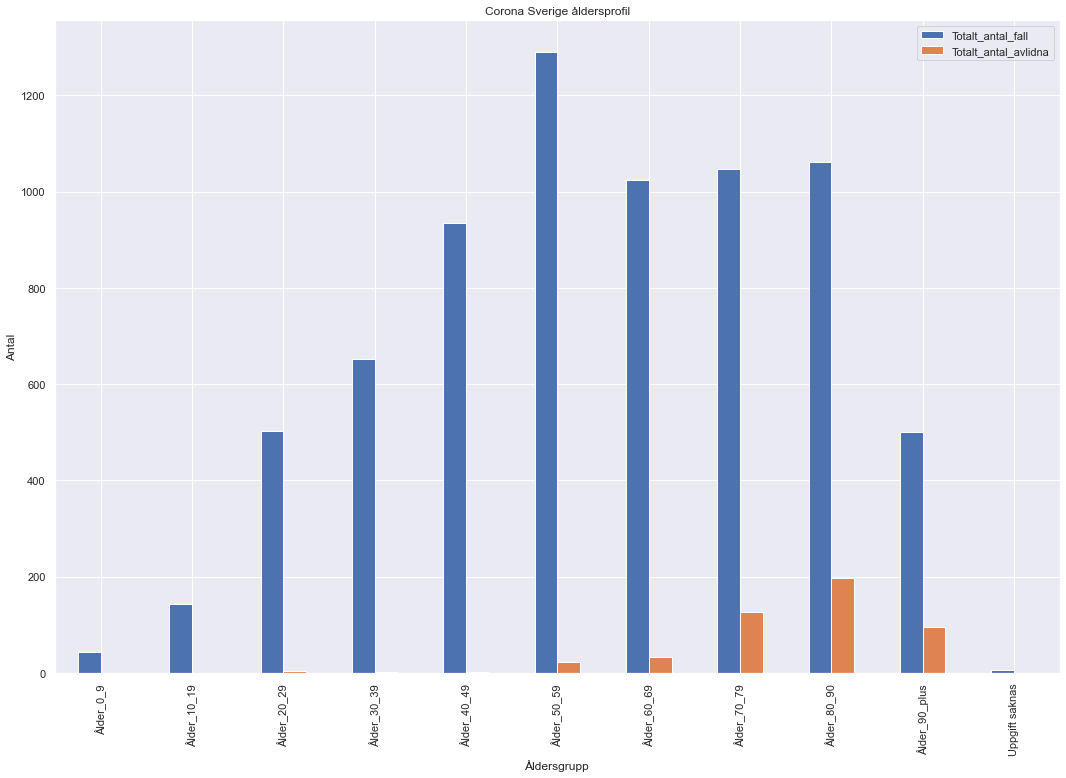

In [8]:
df_age.plot(kind='bar',x='Åldersgrupp',y=['Totalt_antal_fall','Totalt_antal_avlidna'],figsize=(18,12))
plt.title('Corona Sverige åldersprofil')
plt.ylabel('Antal')
plt.savefig('Corona_sverige_age.jpg',format='jpg')

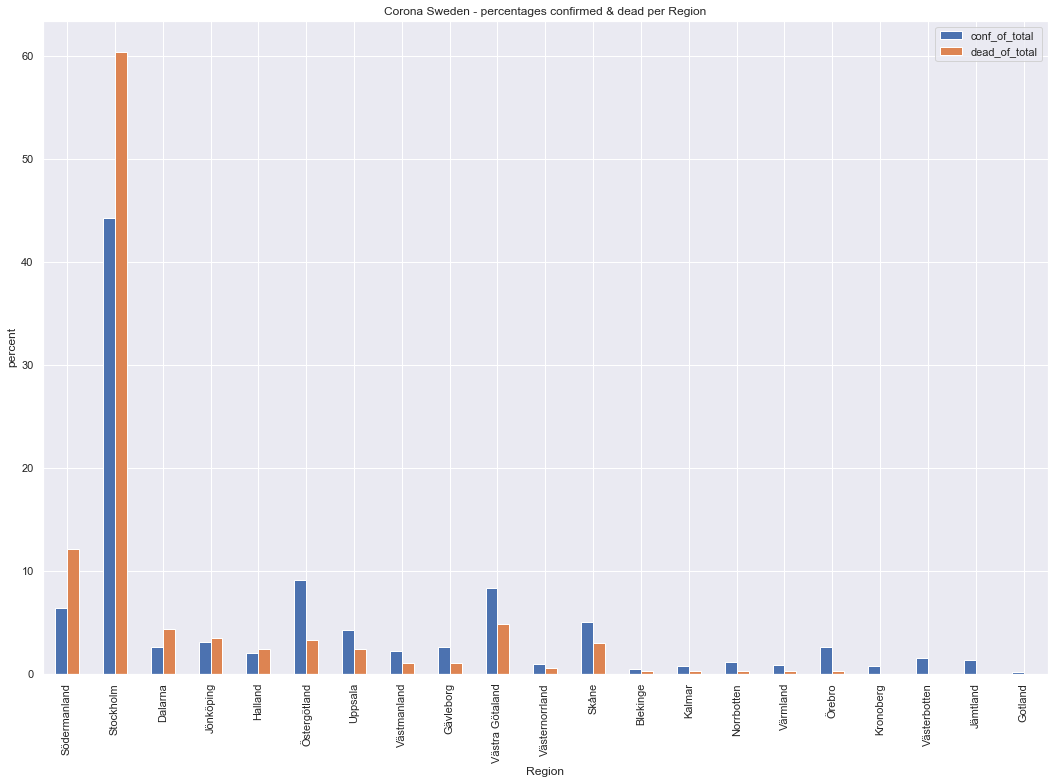

In [9]:
df['conf_of_total'] = 100 * df['confirmed'] / df['confirmed'].sum()
df['dead_of_total'] = 100 * df['dead'] / df['dead'].sum()

df.plot(kind='bar',y=['conf_of_total','dead_of_total'],figsize=(18,12))
plt.title('Corona Sweden - percentages confirmed & dead per Region')
plt.ylabel('percent')
plt.savefig('corona_sweden_regions_pct.jpg',format='jpg')

In [10]:
x_param = 'density'
y_param = 'dead_per_M'

def regression(x_std,y_std):
    
    alpha_mu = pm.Normal('alpha_mu',0,1 / 1 ** 2)
    alpha_sigma = pm.Uniform('alpha_sigma', 0.01, 0.5)
    
    beta_mu = pm.Normal('beta_mu', 0, 1 / 1 ** 2)
    beta_sigma = pm.Uniform('beta_sigma',0.01, 0.5 )
    
    alpha = pm.Normal('alpha',alpha_mu, 1 / alpha_sigma ** 2)
    beta = pm.Normal('beta',beta_mu, 1 / beta_sigma ** 2)
    
    obs_sigma = pm.Uniform('obs_sigma',0,0.5)
    
    @pm.deterministic()
    def linreq(x_std=x_std,alpha=alpha,beta=beta):
        return x_std * beta + alpha
    
    obs = pm.Normal('obs',linreq, 1 / obs_sigma ** 2,observed=True,value=y_std)
    
    model = pm.Model([alpha_mu,alpha_sigma,beta_mu,beta_sigma,alpha,beta,obs_sigma,linreq,obs])
    
    map_ = pm.MAP (model)
    map_.fit()
    
    mcmc = pm.MCMC(model)
    
    sample = mcmc.sample(100000,50000,2)
    
    alpha_post = mcmc.trace('alpha')[:]
    beta_post = mcmc.trace('beta')[:]
    obs_sigma_post = mcmc.trace('obs_sigma')[:]
    
    pmplot(alpha_post,'alpha')
    pmplot(beta_post,'beta')
    pmplot(obs_sigma_post,'obs_sigma')
    
    result = pd.DataFrame({'alpha_post' : alpha_post,
                          'beta_post' : beta_post,
                          'obs_sigma_post' : obs_sigma_post})
    
    return result
    

In [11]:

def plot(x,y,result,x_orig_mean,x_orig_std,y_orig_mean,y_orig_std,region_names):
    
    beta_mean = result.beta_post.mean()
    beta_sigma = result.beta_post.std()
    alpha_mean = result.alpha_post.mean()
    alpha_sigma = result.alpha_post.std()
    beta_89 = np.percentile(result.beta_post,[5.5,94.5])
    alpha_89 = np.percentile(result.alpha_post,[5.5,94.5])
    
    title_suffix = r'$\alpha$: {:.2f} alpha_89: [ {:.2f} , {:.2f} ] $\beta$: {:.2f} beta_89: [ {:.2f} , {:.2f} ]'.format(
    alpha_mean,alpha_89[0],alpha_89[1],beta_mean,beta_89[0],beta_89[1])
    
    plt.figure(figsize=(18,12))
    plt.title('Corona Sverige Regioner/Län: Linear Regression ' + title_suffix)
    
    
    
    plt.xlabel(x_param + r' [STD] $\mu$: {:.2f} $\sigma$: {:.2f}'.format(x_orig_mean,x_orig_std))
    plt.ylabel(y_param + r' [STD] $\mu$: {:.2f} $\sigma$: {:.2f}'.format(y_orig_mean,y_orig_std))
    
    X = np.linspace(min(x),max(x),1000)
    
    alpha_samples = np.random.choice(result.alpha_post,replace=True,size=len(X))
    beta_samples = np.random.choice(result.beta_post,replace=True,size=len(X))
    
    lines = [X[i] * beta_samples + alpha_samples for i in range(len(X))]
    
    plt.plot(X,lines,alpha=0.01,color='red')
    
    rows = np.random.choice(result.index,replace=True,size=len(X))
    
    samples = np.array([pm.rnormal(X[i] * result['beta_post'][rows] + result['alpha_post'][rows],
                                  1 / result['obs_sigma_post'][rows],size=len(X)) for i in range(len(X))])
    
    step = 100
    for i in range(0,len(X),step):
        plt.scatter(X,samples[:,i],edgecolors='orange',facecolors='none',alpha=0.5)
        
    high,low = np.percentile(samples,[5.5,94.5],axis=1)
    
    plt.fill_between(X,high,low,color='c',alpha=0.2)
    
    plt.scatter(x,y,color='lime',s=100)
    
    offset = np.array([-0.05,0.05])
    rotation = np.array([0,45,90])
    
    for i in range(len(x)):
        plt.text(x[i],y[i] + offset[i % 2],region_names[i],rotation=rotation[i % 3],rotation_mode='anchor')
        

In [12]:
def standardize(x):
    return (x - x.mean()) / x.std()

x_std = standardize(df[x_param])
y_std = standardize(df[y_param])

max_std = 5

mask_x = (x_std > -max_std) & (x_std < max_std)
mask_y = (y_std > -max_std) & (y_std < max_std)

mask = mask_x & mask_y

x_std = x_std[mask]
y_std = y_std[mask]
df = df[mask]

region_names = list(df.index.values)
print (region_names)


#result = regression(x_std,y_std)
plot(x_std,y_std,result,df[x_param].mean(),df[x_param].std(),
     df[y_param].mean(),df[y_param].std(),
    region_names)

['Södermanland', 'Stockholm', 'Dalarna', 'Jönköping', 'Halland', 'Östergötland', 'Uppsala', 'Västmanland', 'Gävleborg', 'Västra Götaland', 'Västernorrland', 'Skåne', 'Blekinge', 'Kalmar', 'Norrbotten', 'Värmland', 'Örebro', 'Kronoberg', 'Västerbotten', 'Jämtland', 'Gotland']


NameError: name 'result' is not defined